In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
# from scipy import stats
# from sklearn.preprocessing import OneHotEncoder
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential
# from sklearn.linear_model import LogisticRegression
from collections import deque

In [2]:
#define a function to reading the datasets I collected
def read_in_iPhone_data(path = './01_rawdata/collection/', file = 'z_walk1.csv', merge_wd = True):
    df = pd.read_csv(path+file)
    df['x_axis']=df['userAcceleration.x']+df['gravity.x']
    df['y_axis']=df['userAcceleration.y']+df['gravity.y']
    df['z_axis']=df['userAcceleration.z']+df['gravity.z']
    if merge_wd:      # only need 3 featuress if work with WISDM datasets
        return df[['x_axis','y_axis','z_axis']]
    else:             # all the features could be used if work with MS datasets
        col = ['attitude.roll', 'attitude.pitch',
       'attitude.yaw', 'gravity.x', 'gravity.y', 'gravity.z',
       'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z', 'x_axis', 'y_axis', 'z_axis']
        return df[col]    

In [5]:
#define a function to scale the features, the scaler need to match with the ones used for building the models
def robustscale_data(df,cols,scaler=RobustScaler()):
    scale_columns = cols
    df.loc[:, scale_columns] = scaler.fit_transform(df[scale_columns].to_numpy())
    return df

In [129]:
df = read_in_iPhone_data()
df_jog = read_in_iPhone_data(file='z_jogging1.csv')

In [139]:
df['act'] = 5

In [130]:
df_jog['act'] = 2

In [140]:
df.head()

,x_axis,y_axis,z_axis,act
0,0.121612,-0.494126,-0.931396,5
1,0.125077,-0.517579,-0.988495,5
2,0.105133,-0.492829,-1.029984,5
3,0.053482,-0.464905,-0.957855,5
4,0.029190,-0.445298,-0.990738,5


In [132]:
df_jog.head()

,x_axis,y_axis,z_axis,act
0,0.204651,-0.554016,-0.769303,2
1,0.205124,-0.561096,-0.841354,2
2,0.189698,-0.547699,-0.885574,2
3,0.210525,-0.579956,-0.944229,2
4,0.188507,-0.555908,-0.908447,2


In [142]:
df1.shape

(1000, 4)

In [141]:
df1 = pd.concat([df.iloc[0:500],df_jog.iloc[0:500]])

In [65]:
# # %matplotlib qt5
# plt.ion()
# # time shown in plot (in days)
# visible = 120 

# # initializing deques
# dy1=deque(np.zeros(visible), visible)
# dy2=deque(np.zeros(visible), visible)
# dx=deque(np.zeros(visible), visible)
# data_length = np.linspace(0,df1.shape[0],num=df1.shape[0]+1)

In [49]:
# len(dx)

120

In [62]:
# data_length

In [67]:
df1.shape

(2000, 3)

In [213]:
%matplotlib qt5
plt.ion()
# time shown in plot (in days)
visible = 200 

# initializing deques
dy1=deque(np.zeros(visible), visible)
dy2=deque(np.zeros(visible), visible)
dy3=deque(np.zeros(visible), visible)
dy4=deque(np.zeros(visible), visible)
dx=deque(np.zeros(visible), visible)
data_length = np.linspace(0,df1.shape[0],num=df1.shape[0]+1)

# plotting
fig=plt.figure(figsize=(8,4))
ah1=fig.add_subplot(411)
plt.margins(x=0.001)
ah1.set_ylabel("Sales", fontsize=14)
l1, = ah1.plot(dx, dy1, color='rosybrown', label='x')
ah1.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

ah2=fig.add_subplot(412)
#ah2.set_xlabel("Days", fontsize=14, labelpad=10)
ah2.set_ylabel("Sales", fontsize=14)
l2, = ah2.plot(dx, dy2, color='silver', label='y')
ah2.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

ah3=fig.add_subplot(413)
#ah3.set_xlabel("Days", fontsize=14, labelpad=10)
ah3.set_ylabel("Sales", fontsize=14)
l3, = ah3.plot(dx, dy2, color='blue', label='z')
ah3.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

ah4=fig.add_subplot(414)
#ah3.set_xlabel("Days", fontsize=14, labelpad=10)
ah4.set_ylabel("Sales", fontsize=14)
l4, = ah4.plot(dx, dy2, color='blue', label='act')
ah4.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)


x_data=0
# i=0
while x_data+visible <= df1.shape[0]: 

    # update data    
    dy1.extend(df1['x_axis'].iloc[x_data:x_data+visible])
    dy2.extend(df1['y_axis'].iloc[x_data:x_data+visible])
    dy3.extend(df1['z_axis'].iloc[x_data:x_data+visible])
    dy4.extend(df1['act'].iloc[x_data:x_data+visible])
    dx.extend(data_length[x_data:x_data+visible])

    # update plot    
    l1.set_ydata(dy1)  
    l2.set_ydata(dy2)
    l3.set_ydata(dy3)
    l4.set_ydata(dy4)
    l1.set_xdata(dx)
    l2.set_xdata(dx)
    l3.set_xdata(dx)
    l4.set_xdata(dx)
    
    # calculate mean    
    mdy1=np.mean(dy1)
    mdy2=np.mean(dy2)
    mdy3=np.mean(dy3)
    
    # set axes    
    ah1.set_ylim(-2+mdy1, 2+mdy1)
    ah1.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah2.set_ylim(-2+mdy2, 2+mdy2)
    ah2.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah3.set_ylim(-2+mdy3, 2+mdy3)
    ah3.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah4.set_ylim(-1, 6)
    ah4.set_xlim(data_length[x_data], data_length[x_data+visible])

    # control speed of moving time-series    
    x_data += 5
#     i+=1
#     print(i)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [156]:
dict_name = {i:'dy'+str(i) for i in range(1,5)}

In [181]:
df1.iloc[:,0:4]

,x_axis,y_axis,z_axis,act
0,0.121612,-0.494126,-0.931396,5
1,0.125077,-0.517579,-0.988495,5
2,0.105133,-0.492829,-1.029984,5
3,0.053482,-0.464905,-0.957855,5
4,0.029190,-0.445298,-0.990738,5
...,...,...,...,...
495,0.211553,0.513636,-0.463729,2
496,0.021810,1.496013,-0.585126,2
497,-0.433404,2.898157,-0.946956,2
498,-0.721931,3.327570,-1.350763,2


In [234]:
def plot_realtime(visible = 200,df1 = df1, shift = 5):
    %matplotlib qt5
    plt.ion()
    # time shown in plot (in days)
#     visible = 200 
    col = df1.shape[1]
    # initializing deques
    dy = [None for _ in range(col)]
    ah = [None for _ in range(col)]
    l = [None for _ in range(col)]
#     mdy = [None for _ in range(col)]
    colors = ['rosybrown','slategray','green','navy']
    for i in range(col):
        dy[i] = deque(np.zeros(visible), visible)
         
    dx=deque(np.zeros(visible), visible)
    data_length = np.linspace(0,df1.shape[0],num=df1.shape[0]+1)

    # plotting
    fig=plt.figure(figsize=(8,4))
    
    
    for i in range(col):
        ah[i] = fig.add_subplot(4,1,i+1)
        plt.margins(x=0.001)
        ah[i].set_ylabel("Sales", fontsize=14)
        l[i], = ah[i].plot(dx, dy[i], color=colors[i], label='x')
        ah[i].legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
        
        x_data=0
        # i=0
    while x_data+visible <= df1.shape[0]: 
        dx.extend(data_length[x_data:x_data+visible])
        for i in range(col):
            dy[i].extend(df1.iloc[:,i].iloc[x_data:x_data+visible])
            l[i].set_ydata(dy[i])
            l[i].set_xdata(dx)
#             mdy[i]=np.mean(dy[i])
            ah[i].set_ylim(-2+np.min(dy[i]), 2+np.max(dy[i]))
            ah[i].set_xlim(data_length[x_data], data_length[x_data+visible])

            # control speed of moving time-series    
        x_data += shift
        
        fig.canvas.draw()
        fig.canvas.flush_events()

In [238]:
plot_realtime(visible=500,shift=10,df1 = df)

In [92]:
# import matplotlib.pyplot as plt
# import numpy as np

# # use ggplot style for more sophisticated visuals
# plt.style.use('ggplot')

def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.1):
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))
        plt.show()
    
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    plt.pause(pause_time)
    
    # return line so we can update it again in the next iteration
    return line1

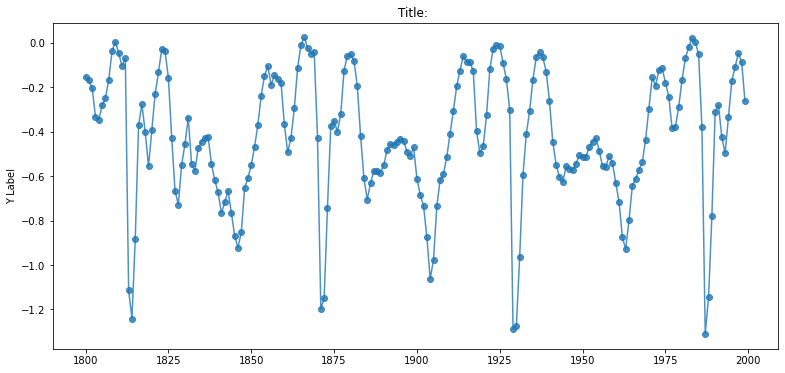

In [95]:
live_plotter(dx,dy1,[])

In [147]:
 animation.FuncAnimation

NameError: name 'animation' is not defined